In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('images/lenna.png')

In [3]:
# Define shearing factors (adjust as needed)
shear_x = 0.40  # Shear along x-axis
shear_y = -0.25  # Shear along y-axis

# Create transformation matrix
M = np.array([[1, shear_x, 0],
              [shear_y, 1, 0],
              [0, 0, 1]])

rows, cols, _ = img.shape

T = np.float32([[1, 0, 0], [0, 1, 150]]) 
  
# We use warpAffine to transform the image using the matrix, T 
img_translation = cv2.warpAffine(img, T, (int(cols*1.5), int(rows*1.5))) 

sheared_img = cv2.warpPerspective(img_translation, M, (int(cols*1.5), int(rows*1.5)))

In [4]:
cv2.imshow('Sheared Image', sheared_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
sheared_img.shape

(768, 768, 3)

##### Shearing using skimage

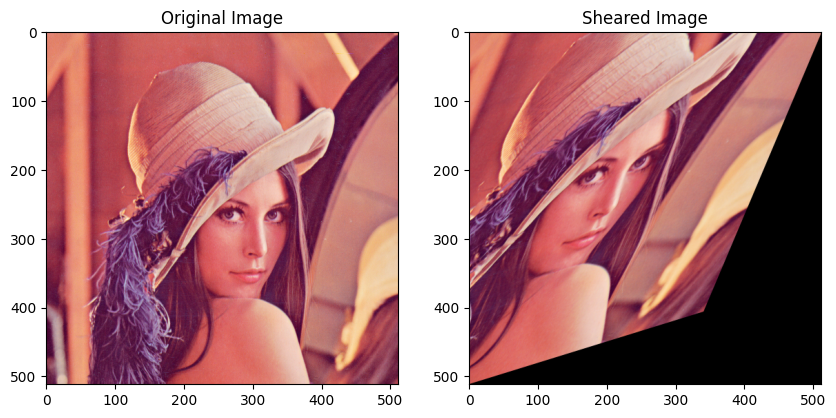

In [7]:
from skimage import transform
from skimage import io

img = io.imread('images/lenna.png')

# Define shearing factors
shear_x = -0.4
shear_y = -0.3

# Create transformation matrix
tform = transform.AffineTransform(shear=(shear_x, shear_y))

# Apply transformation using warp
img_sheared = transform.warp(img, tform)

# Display images (using matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(img_sheared), plt.title('Sheared Image')
plt.show()

In [8]:
help(transform.AffineTransform)

Help on class AffineTransform in module skimage.transform._geometric:

class AffineTransform(ProjectiveTransform)
 |  AffineTransform(matrix=None, scale=None, rotation=None, shear=None, translation=None, *, dimensionality=2)
 |  
 |  Affine transformation.
 |  
 |  Has the following form::
 |  
 |      X = a0 * x + a1 * y + a2
 |        =   sx * x * [cos(rotation) + tan(shear_y) * sin(rotation)]
 |          - sy * y * [tan(shear_x) * cos(rotation) + sin(rotation)]
 |          + translation_x
 |  
 |      Y = b0 * x + b1 * y + b2
 |        =   sx * x * [sin(rotation) - tan(shear_y) * cos(rotation)]
 |          - sy * y * [tan(shear_x) * sin(rotation) - cos(rotation)]
 |          + translation_y
 |  
 |  where ``sx`` and ``sy`` are scale factors in the x and y directions.
 |  
 |  This is equivalent to applying the operations in the following order:
 |  
 |  1. Scale
 |  2. Shear
 |  3. Rotate
 |  4. Translate
 |  
 |  The homogeneous transformation matrix is::
 |  
 |      [[a0  a1  a2]

##### Affine Transformation

In [19]:
import cv2
import numpy as np

img = cv2.imread('images/lenna.png')

# Define transformation parameters
tx = 50  # Translation along x-axis
ty = 100  # Translation along y-axis
angle = 45  # Rotation angle in degrees
scale = 1.2  # Scaling factor
shear_x = 0.3  # Shearing along x-axis
shear_y = 0.2  # Shearing along y-axis

# Create transformation matrix
M = np.float32([[scale * np.cos(np.radians(angle)), shear_x, tx],
                [shear_y, scale * np.sin(np.radians(angle)), ty]])

# Apply transformation using warpAffine
img_affine = cv2.warpAffine(img, M, (512, 512))

new_image = np.vstack([img, img_affine])

# Display original and affine transformed images
cv2.imshow('Affine Transformed Image', new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
import cv2
import numpy as np

img = cv2.imread('images/lenna.png')

# Define transformation parameters
tx = 100  # Translation along x-axis
ty = 100  # Translation along y-axis
angle = 40  # Rotation angle in degrees
scale = 0.6  # Scaling factor
shear_x = 0.2  # Shearing along x-axis
shear_y = 0  # Shearing along y-axis

# Create transformation matrix
M = np.float32([[scale * np.cos(np.radians(angle)), shear_x, tx],
                [shear_y, scale * np.sin(np.radians(angle)), ty]])

# Apply transformation using warpAffine
img_affine = cv2.warpAffine(img, M, (512, 512))

new_image = np.vstack([img, img_affine])

# Display original and affine transformed images
cv2.imshow('Affine Transformed Image', new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
M

array([[  0.45962667,   0.2       , 100.        ],
       [  0.        ,   0.38567257, 100.        ]], dtype=float32)

##### Affine Transformation using skimage

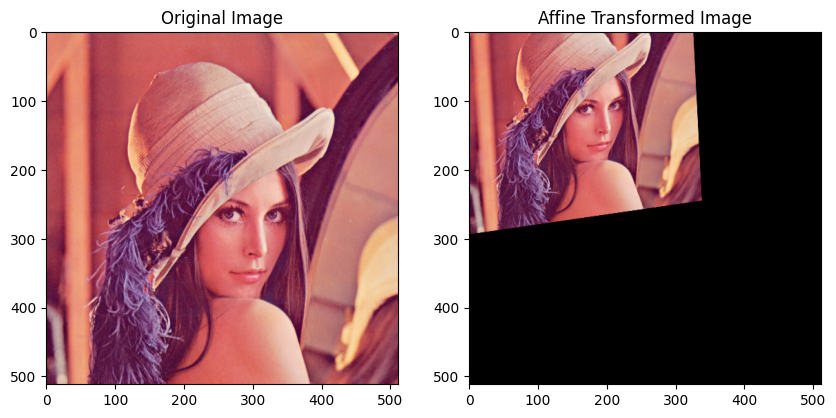

In [33]:
from skimage import transform
from skimage import io

img = io.imread('images/lenna.png')

# Define transformation parameters
tx = 20  # Translation along x-axis
ty = 50  # Translation along y-axis
angle = 20  # Rotation angle in degrees
scale = 1.5  # Scaling factor
shear_x = -0.3  # Shearing along x-axis
shear_y = 0.2  # Shearing along y-axis
tform = transform.AffineTransform(scale=(scale, scale), 
                                   rotation=np.radians(angle),
                                   translation=(tx, ty),
                                   shear=(shear_x, shear_y))

# Apply transformation using warp
img_affine = transform.warp(img, tform)

# Display images (using matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(img_affine), plt.title('Affine Transformed Image')
plt.show()

##### Projective Transformation

In [49]:
import cv2
import numpy as np

img = cv2.imread('images/lenna.png')  # Load image

# Define source and destination points (4 corresponding points)
source_points = np.array([[100, 50], [200, 50], [200, 150], [100, 150]], 
                         dtype=np.float32)
destination_points = np.array([[50, 50], [250, 50], [200, 250], [60, 250]], 
                              dtype=np.float32)

# Compute transformation matrix
M = cv2.findHomography(source_points, destination_points)[0]

# Apply transformation using warpPerspective
img_transformed = cv2.warpPerspective(img, M, (1024, 1024))

# Display original and transformed images
cv2.imshow('Original Image', img)
cv2.imshow('Projectively Transformed Image', img_transformed)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Projective Transformation using skimage

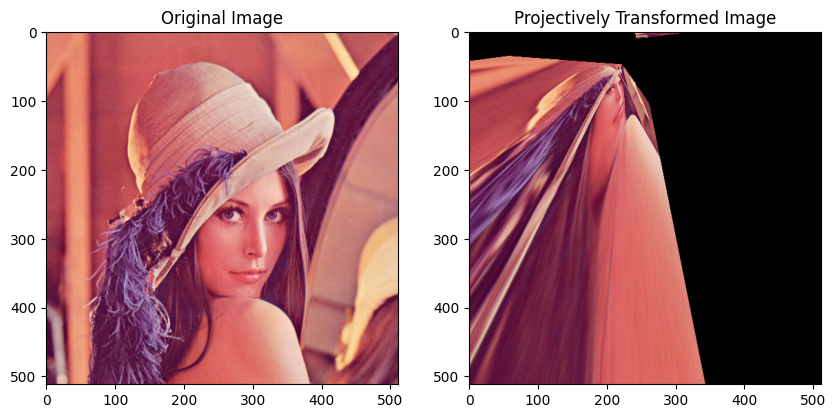

In [52]:
from skimage import transform
from skimage import io

img = io.imread('images/lenna.png')

# Define source and destination points (4 corresponding points)
source_points = [[100, 50], [200, 50], [200, 150], [100, 150]]
destination_points = [[50, 50], [250, 50], [250, 350], [50, 250]]

# Create transformation object
tform = transform.ProjectiveTransform()

# Fit the transformation using source and destination points
tform.estimate(source_points, destination_points)

# Apply transformation using warp
img_transformed = transform.warp(img, tform)

# Display images (using matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(img_transformed), 
plt.title('Projectively Transformed Image')
plt.show()

##### Erosion and Delation

In [56]:
import cv2
import numpy as np

# Load image and convert to grayscale (if needed)
gray = cv2.imread('images/lenna.png', 0)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to create binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Erosion - remove noise
eroded = cv2.erode(thresh, np.ones((3, 3), np.uint8))

# Dilation - expand objects
dilated = cv2.dilate(thresh, np.ones((3, 3), np.uint8))

# Opening - reduce noise while preserving object size
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))

# Closing - fill small holes
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))

# Display results
cv2.imshow('Original Image', thresh)
cv2.imshow('Eroded', eroded)
cv2.imshow('Dilated', dilated)
cv2.imshow('Opening', opening)
cv2.imshow('Closing', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()